# Imports

In [4]:
!pip install tensorflow keras matplotlib scipy opencv-python

In [5]:
from scipy.io import loadmat

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.image import imread

from PIL import Image, ImageFilter, ImageOps
from PIL.Image import Transpose

import tensorflow as tf

In [6]:
train_data = loadmat("data/train_data.mat")
test_data = loadmat("data/test_data.mat")
file_list = loadmat("data/lists/file_list.mat")

# Exploring data files

### train_data.mat, test_data.map

In [7]:
train_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Mar 28 12:03:37 2012',
 '__version__': '1.0',
 '__globals__': [],
 'train_info': array([[(array([[array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')],
                [array(['n02085620-Chihuahua/n02085620_4441.jpg'], dtype='<U38')],
                [array(['n02085620-Chihuahua/n02085620_1502.jpg'], dtype='<U38')],
                ...,
                [array(['n02116738-African_hunting_dog/n02116738_6754.jpg'], dtype='<U48')],
                [array(['n02116738-African_hunting_dog/n02116738_9333.jpg'], dtype='<U48')],
                [array(['n02116738-African_hunting_dog/n02116738_2503.jpg'], dtype='<U48')]],
               dtype=object), array([[array(['n02085620-Chihuahua/n02085620_5927'], dtype='<U34')],
                [array(['n02085620-Chihuahua/n02085620_4441'], dtype='<U34')],
                [array(['n02085620-Chihuahua/n02085620_1502'], dtype='<U34')],
                ...,
                [

In [8]:
train_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'train_info', 'train_fg_data', 'train_data'])

In [9]:
print("nb. train images:", len(train_data["train_info"][0][0][0]))
print("First image")
print("image path:", train_data["train_info"][0][0][0][0])
print("image name:", train_data["train_info"][0][0][1][0])
print("label id:", train_data["train_info"][0][0][2][0])
print("histogram path:", train_data["train_info"][0][0][3][0])

nb. train images: 12000
First image
image path: [array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')]
image name: [array(['n02085620-Chihuahua/n02085620_5927'], dtype='<U34')]
label id: [1]
histogram path: [array(['histograms_spm/n02085620-Chihuahua/n02085620_5927.mat'],
       dtype='<U53')                                             ]


In [10]:
print("features for the first image:", train_data["train_fg_data"][0])
print("nb. features: ", len(train_data["train_fg_data"][0]))

features for the first image: [0.0004329  0.0002886  0.0002886  ... 0.00039683 0.00032468 0.0023088 ]
nb. features:  5376


In [11]:
print(train_data["train_data"].shape)
print("0,0:", train_data["train_data"][0][0])
print("0,155:", train_data["train_data"][0][155])

(12000, 12000)
0,0: 1.0000000000000022
0,155: 0.21806947822826012


### file_list.map, train_list.map, test_list.map

In [12]:
file_list

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct  9 08:29:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'file_list': array([[array(['n02085620-Chihuahua/n02085620_10074.jpg'], dtype='<U39')],
        [array(['n02085620-Chihuahua/n02085620_10131.jpg'], dtype='<U39')],
        [array(['n02085620-Chihuahua/n02085620_10621.jpg'], dtype='<U39')],
        ...,
        [array(['n02116738-African_hunting_dog/n02116738_9829.jpg'], dtype='<U48')],
        [array(['n02116738-African_hunting_dog/n02116738_9844.jpg'], dtype='<U48')],
        [array(['n02116738-African_hunting_dog/n02116738_9924.jpg'], dtype='<U48')]],
       dtype=object),
 'annotation_list': array([[array(['n02085620-Chihuahua/n02085620_10074'], dtype='<U35')],
        [array(['n02085620-Chihuahua/n02085620_10131'], dtype='<U35')],
        [array(['n02085620-Chihuahua/n02085620_10621'], dtype='<U35')],
        ...,
        [array(['n02116738-African_hunting_dog/n02116738_9829'], dtype='<U44')],


In [13]:
file_list.keys()

dict_keys(['__header__', '__version__', '__globals__', 'file_list', 'annotation_list', 'labels'])

In [14]:
file_list["file_list"]

array([[array(['n02085620-Chihuahua/n02085620_10074.jpg'], dtype='<U39')],
       [array(['n02085620-Chihuahua/n02085620_10131.jpg'], dtype='<U39')],
       [array(['n02085620-Chihuahua/n02085620_10621.jpg'], dtype='<U39')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_9829.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_9844.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_9924.jpg'], dtype='<U48')]],
      dtype=object)

In [15]:
file_list["annotation_list"]

array([[array(['n02085620-Chihuahua/n02085620_10074'], dtype='<U35')],
       [array(['n02085620-Chihuahua/n02085620_10131'], dtype='<U35')],
       [array(['n02085620-Chihuahua/n02085620_10621'], dtype='<U35')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_9829'], dtype='<U44')],
       [array(['n02116738-African_hunting_dog/n02116738_9844'], dtype='<U44')],
       [array(['n02116738-African_hunting_dog/n02116738_9924'], dtype='<U44')]],
      dtype=object)

In [16]:
file_list["labels"]

array([[  1],
       [  1],
       [  1],
       ...,
       [120],
       [120],
       [120]], dtype=uint8)

# Image preprocessing

### Train and test dataframes

In [17]:
train_filenames = []
for i in range(len(train_data["train_info"][0][0][0])):
    train_filenames.append(f"data/Images/{train_data['train_info'][0][0][0][i][0][0]}")
train_labels = [train_data["train_info"][0][0][2][i][0] for i in range(len(train_data["train_info"][0][0][2]))]

test_filenames = []
for i in range(len(test_data["test_info"][0][0][0])):
    test_filenames.append(f"data/Images/{test_data['test_info'][0][0][0][i][0][0]}")
test_labels = [test_data["test_info"][0][0][2][i][0] for i in range(len(test_data["test_info"][0][0][2]))]

In [18]:
train_filenames[0:10], train_labels[0:10]

(['data/Images/n02085620-Chihuahua/n02085620_5927.jpg',
  'data/Images/n02085620-Chihuahua/n02085620_4441.jpg',
  'data/Images/n02085620-Chihuahua/n02085620_1502.jpg',
  'data/Images/n02085620-Chihuahua/n02085620_1916.jpg',
  'data/Images/n02085620-Chihuahua/n02085620_13151.jpg',
  'data/Images/n02085620-Chihuahua/n02085620_1569.jpg',
  'data/Images/n02085620-Chihuahua/n02085620_9654.jpg',
  'data/Images/n02085620-Chihuahua/n02085620_3975.jpg',
  'data/Images/n02085620-Chihuahua/n02085620_3942.jpg',
  'data/Images/n02085620-Chihuahua/n02085620_9351.jpg'],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
train_df = pd.DataFrame.from_dict({"filename": train_filenames, "label": train_labels})
test_df = pd.DataFrame.from_dict({"filename": test_filenames, "label": test_labels})

for i, row in train_df.iterrows():
    train_df.at[i, "label_name"] = row["filename"].split("/")[2].split("-")[1]
for i, row in test_df.iterrows():
    test_df.at[i, "label_name"] = row["filename"].split("/")[2].split("-")[1]

In [20]:
train_df

filename  label  \
0      data/Images/n02085620-Chihuahua/n02085620_5927...      1   
1      data/Images/n02085620-Chihuahua/n02085620_4441...      1   
2      data/Images/n02085620-Chihuahua/n02085620_1502...      1   
3      data/Images/n02085620-Chihuahua/n02085620_1916...      1   
4      data/Images/n02085620-Chihuahua/n02085620_1315...      1   
...                                                  ...    ...   
11995  data/Images/n02116738-African_hunting_dog/n021...    120   
11996  data/Images/n02116738-African_hunting_dog/n021...    120   
11997  data/Images/n02116738-African_hunting_dog/n021...    120   
11998  data/Images/n02116738-African_hunting_dog/n021...    120   
11999  data/Images/n02116738-African_hunting_dog/n021...    120   

                label_name  
0                Chihuahua  
1                Chihuahua  
2                Chihuahua  
3                Chihuahua  
4                Chihuahua  
...                    ...  
11995  African_hunting_dog  
11996  African_hunting_dog  
11997  African_hunting_dog  
11998  African_hunting_dog  
11999  African_hunting_dog  

[12000 rows x 3 columns]

### Exploring images

Chihuahua


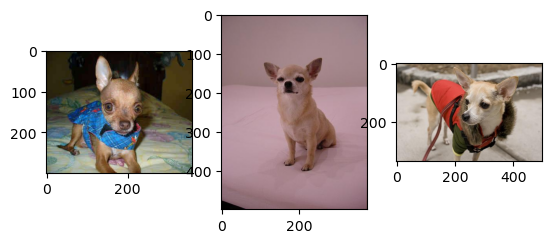

Japanese_spaniel


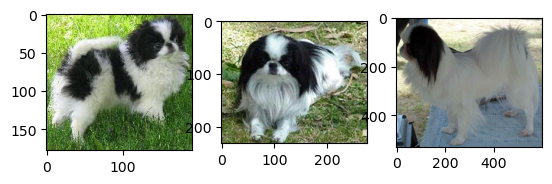

Maltese_dog


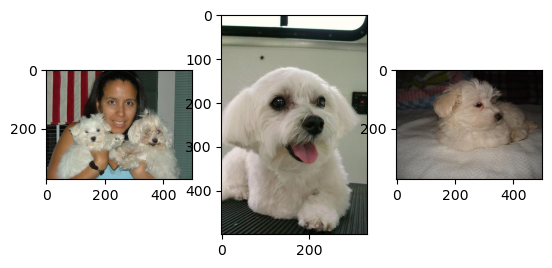

Pekinese


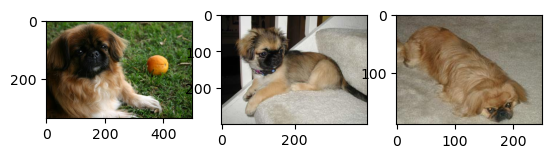

Shih


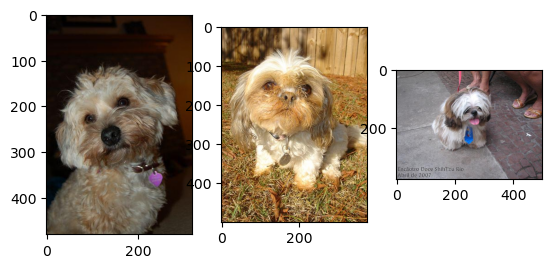

Blenheim_spaniel


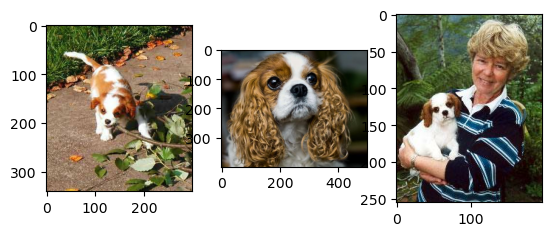

papillon


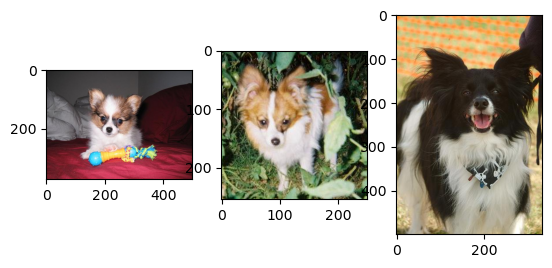

toy_terrier


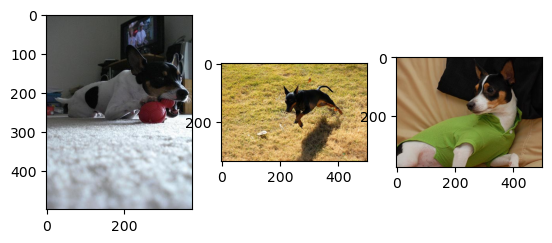

Rhodesian_ridgeback


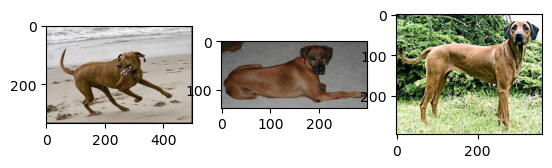

Afghan_hound


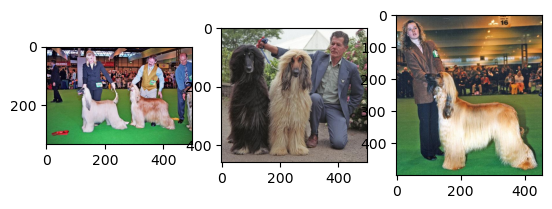

In [21]:
for name in train_df.label_name.unique()[:10] :
    print(name)
    l_filenames_label = list(train_df.loc[train_df.label_name == name, :]["filename"])
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = l_filenames_label[i]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

### Testing image transformations

#### Original image

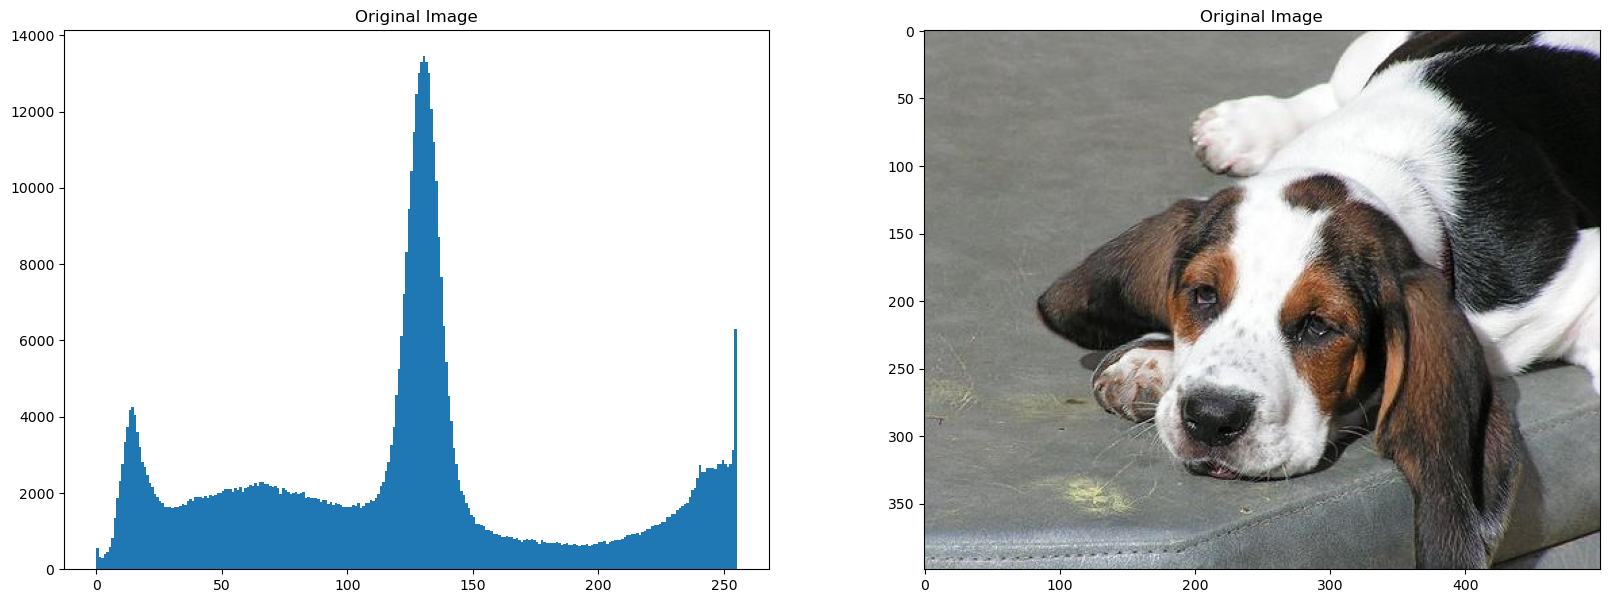

In [22]:
img = Image.open(train_df.filename[1000])
img_array = np.array(img)

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.hist(img_array.flatten(), bins=range(256))
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(img)
plt.title("Original Image")
plt.show()


#### Blur

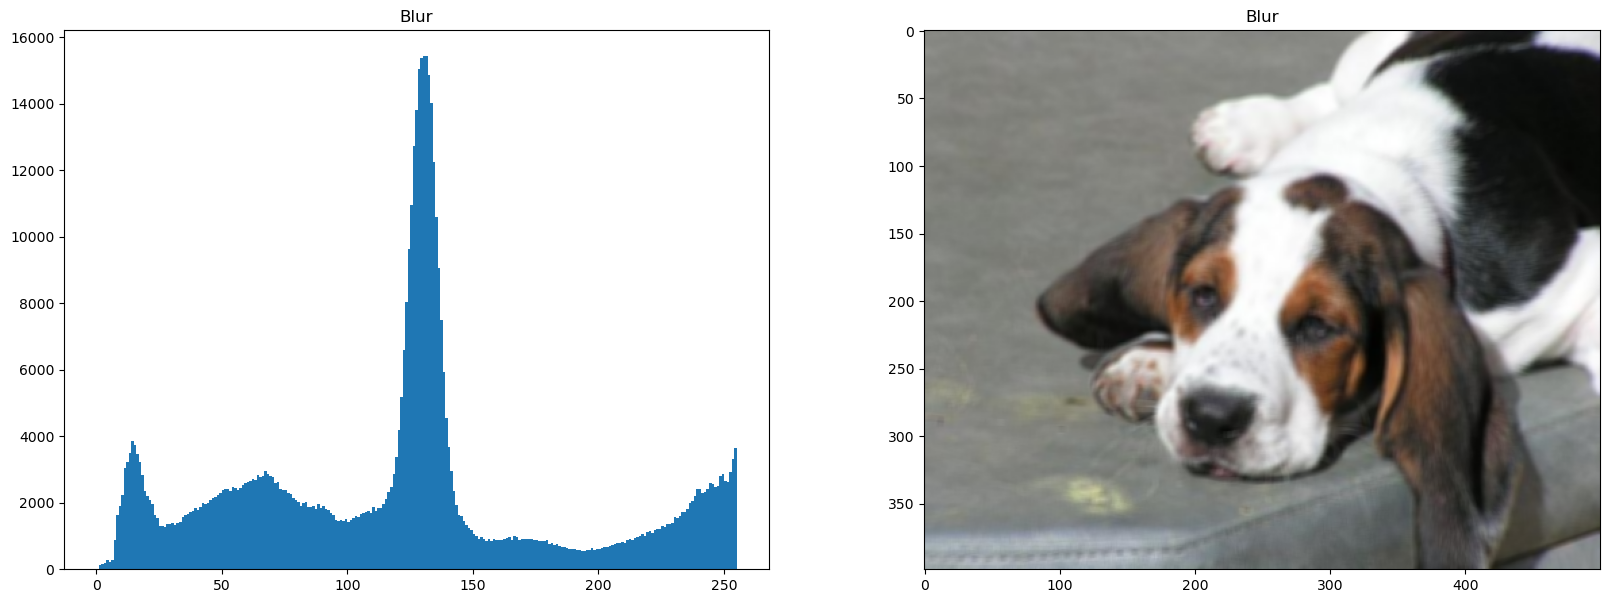

In [23]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.hist(np.array(img.filter(ImageFilter.BoxBlur(2))).flatten(), bins=range(256))
plt.title("Blur")
plt.subplot(1,2,2)
plt.imshow(img.filter(ImageFilter.BoxBlur(2)))
plt.title("Blur")
plt.show()

#### Gaussian blur

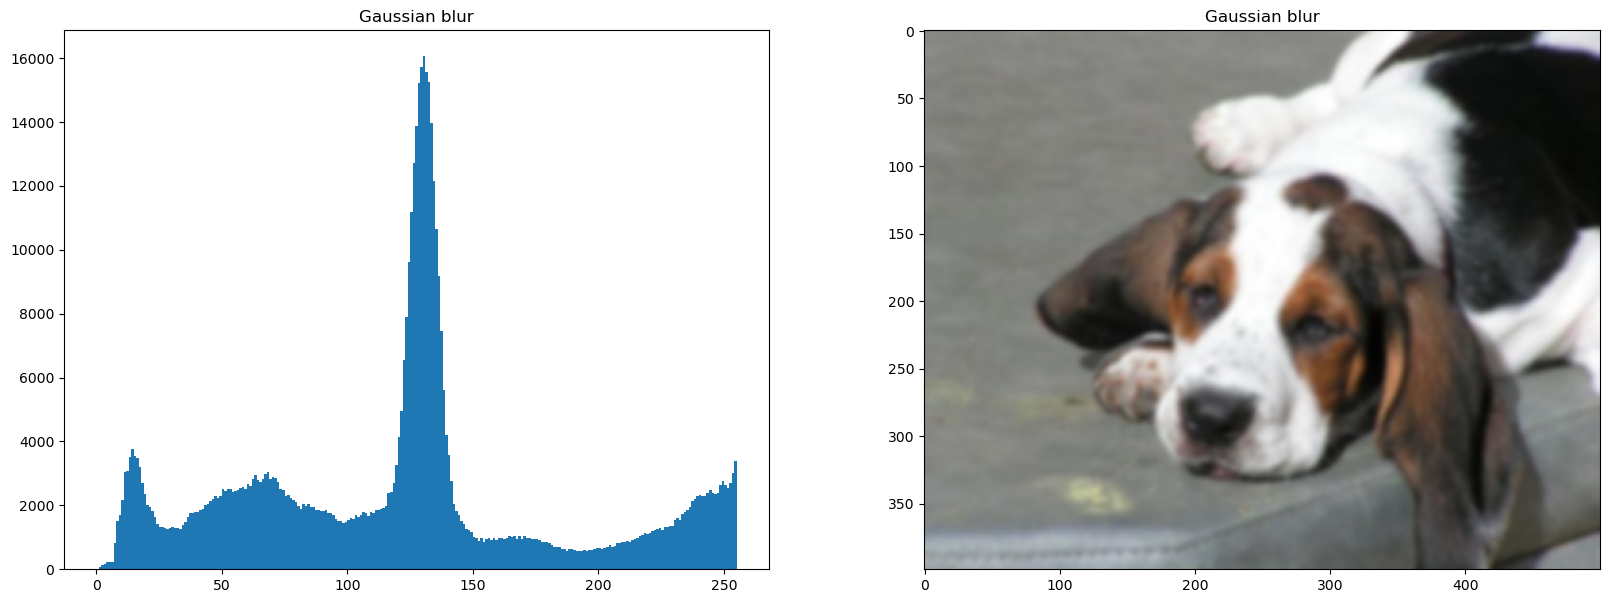

In [24]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.hist(np.array(img.filter(ImageFilter.GaussianBlur(radius=2))).flatten(), bins=range(256))
plt.title("Gaussian blur")
plt.subplot(1,2,2)
plt.imshow(img.filter(ImageFilter.GaussianBlur(radius=2)))
plt.title("Gaussian blur")
plt.show()

#### autocontrast

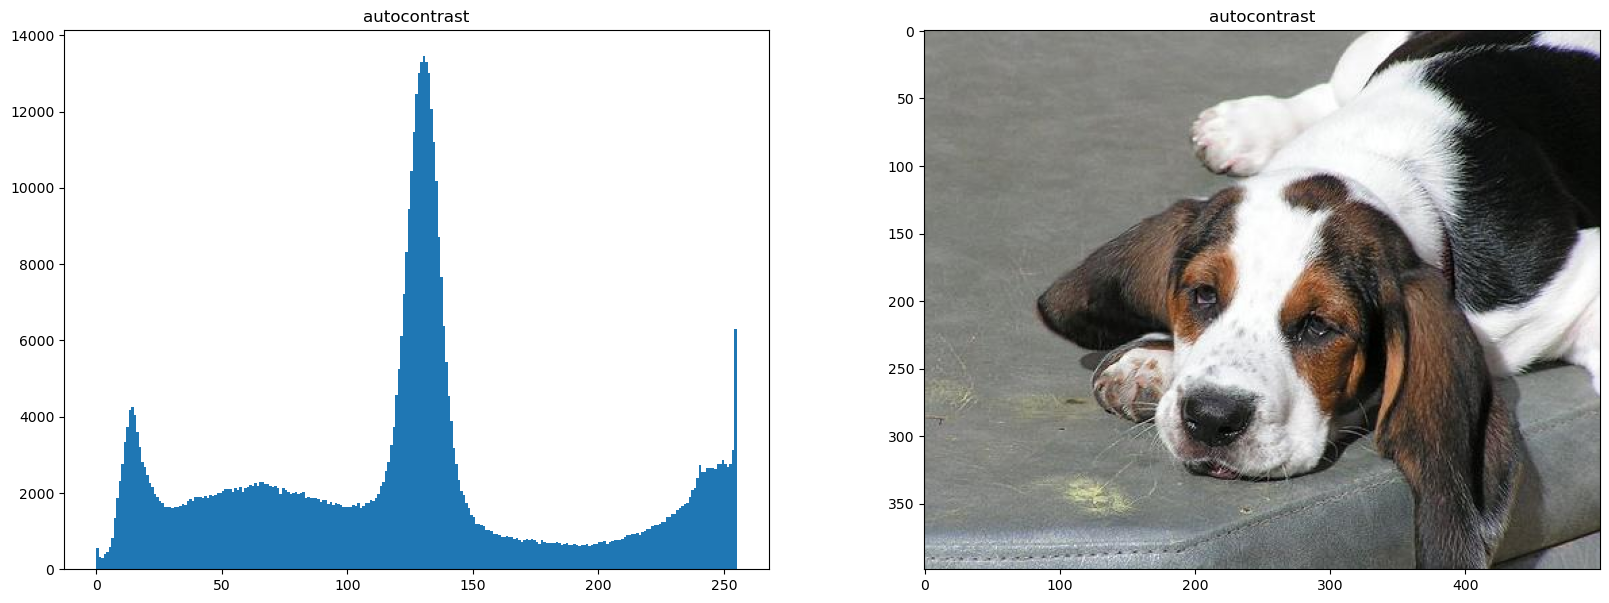

In [25]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.hist(np.array(ImageOps.autocontrast(img)).flatten(), bins=range(256))
plt.title("autocontrast")
plt.subplot(1,2,2)
plt.imshow(ImageOps.autocontrast(img))
plt.title("autocontrast")
plt.show()

#### Equalization

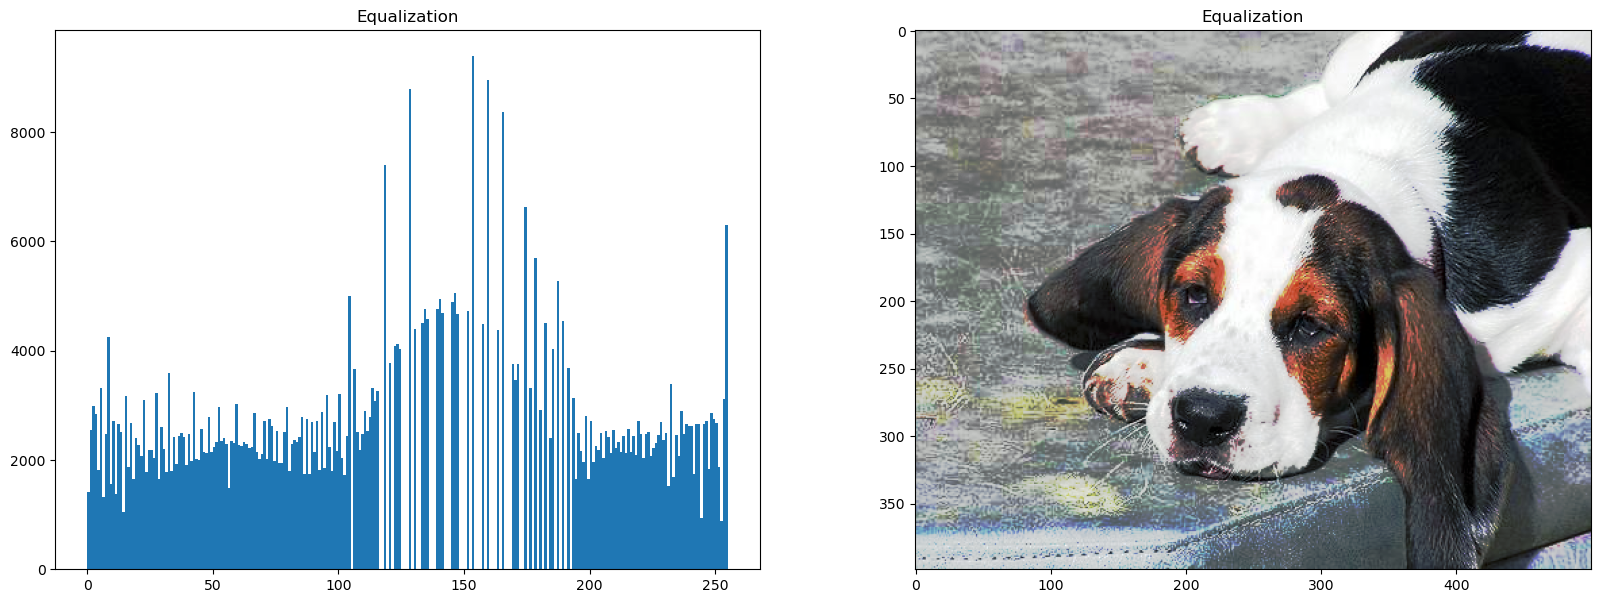

In [26]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.hist(np.array(ImageOps.equalize(img)).flatten(), bins=range(256))
plt.title("Equalization")
plt.subplot(1,2,2)
plt.imshow(ImageOps.equalize(img))
plt.title("Equalization")
plt.show()

#### Geometrical operations

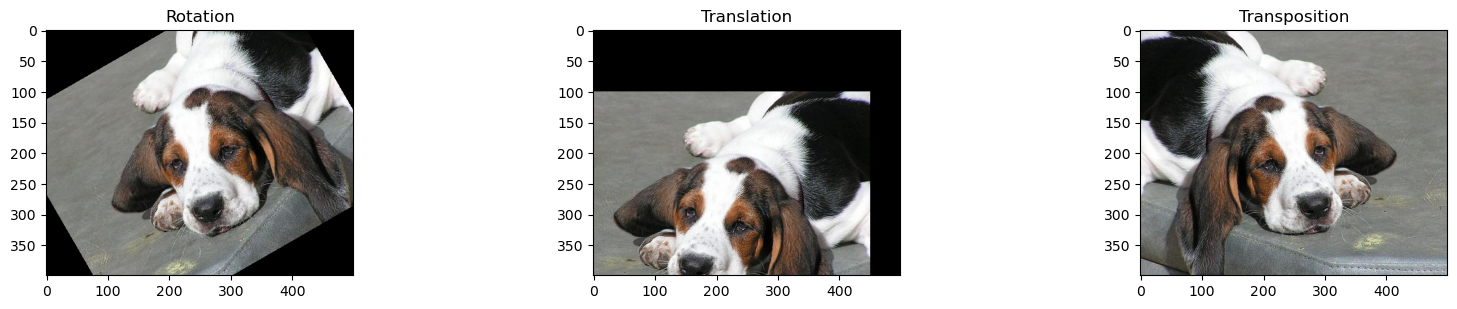

In [27]:
plt.figure(figsize=(20,7))
plt.subplot(2,3,1)
plt.title("Rotation")
plt.imshow(img.rotate(30))
plt.subplot(2,3,2)
plt.title("Translation")
plt.imshow(img.rotate(0, translate=[-50, 100]))
plt.subplot(2,3,3)
plt.title("Transposition")
plt.imshow(img.transpose(Transpose.FLIP_LEFT_RIGHT))
plt.show()

### ImageDataGenerator

In [28]:
def data_flow_fct(data, datagen, batch_size=32, data_type=None):

    data_flow = datagen.flow_from_dataframe(
        data, 
        directory='',
        x_col='filename',
        y_col='label_name',
        weight_col=None,
        target_size=(224, 224),
        classes=None,
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=True,
        seed=42,
        subset=data_type
    )
    
    return data_flow

In [29]:
# with data augmentation
datagen_train = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.25
    )

# without data augmentation
datagen_train_bis = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.25
)

# test data generator
datagen_test = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255
)

train_flow = data_flow_fct(train_df, datagen_train, data_type='training')
val_flow = data_flow_fct(train_df, datagen_train, data_type='validation')

train_flow_bis = data_flow_fct(train_df, datagen_train_bis, data_type='training')
val_flow_bis = data_flow_fct(train_df, datagen_train_bis, data_type='validation')

test_flow = data_flow_fct(test_df, datagen_test, data_type=None)

Found 9000 validated image filenames belonging to 120 classes.
Found 3000 validated image filenames belonging to 120 classes.
Found 9000 validated image filenames belonging to 120 classes.
Found 3000 validated image filenames belonging to 120 classes.
Found 8580 validated image filenames belonging to 120 classes.


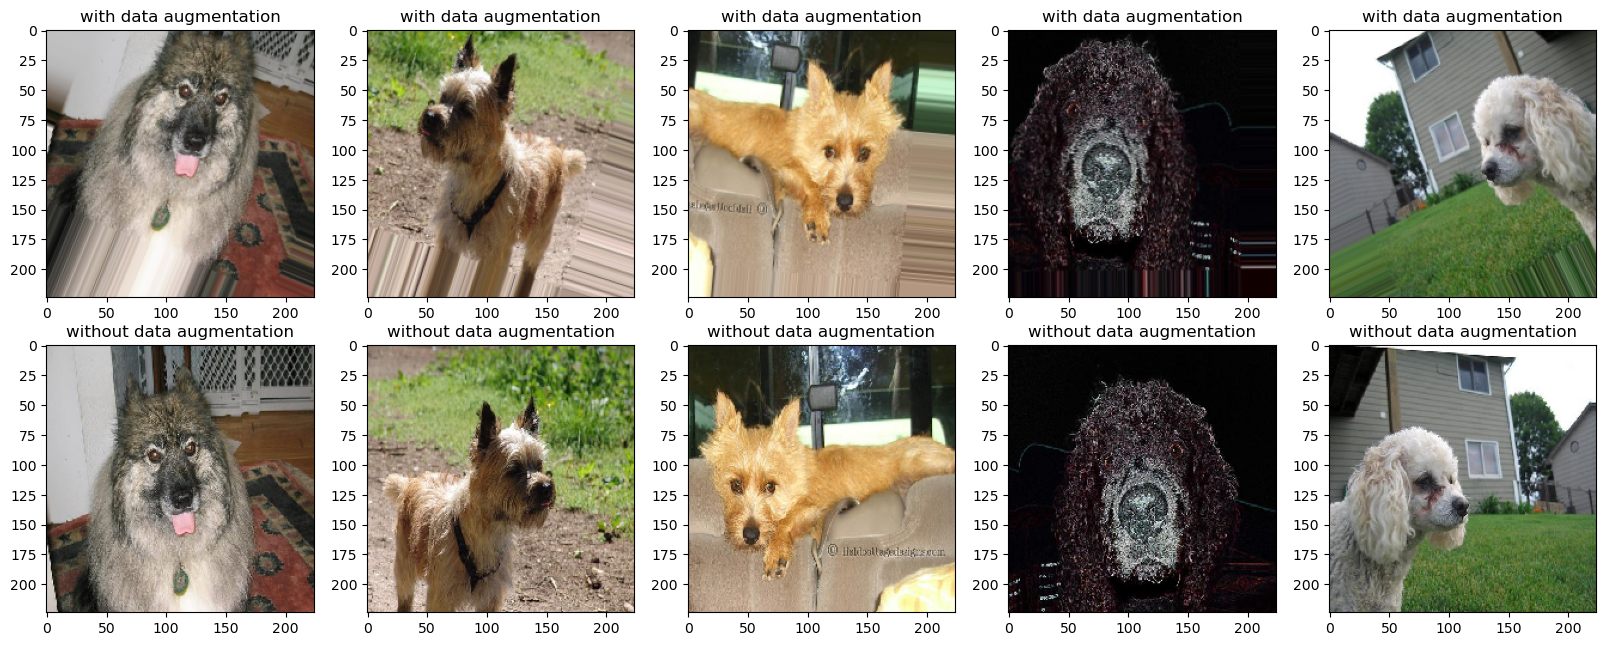

In [30]:
images, labels = next(train_flow)
images_bis, labels_bis = next(train_flow_bis)

plt.figure(figsize=(20, 15))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i])
    plt.title("with data augmentation")
    plt.subplot(2,5,5+i+1)
    plt.imshow(images_bis[i])
    plt.title("without data augmentation")

# Saving

In [31]:
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")